# Task M5 T02
## Train-Test exercises with Python ScikitLearn

Description
Train-Test exercises with ScikitLearn from a dataset with information about housing in Houston.

### - Exercise 1

Start the attached data set in train and test. Study the two sets separately, at a descriptive level.
Also attached you will find a description of the different variables of the dataset.

In [409]:
import pandas as pd

col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_main = pd.read_csv('housing data.csv', sep=',', names=col_names, header=None)

print(df_main.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [410]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


For better understanding, we graph the dataset.

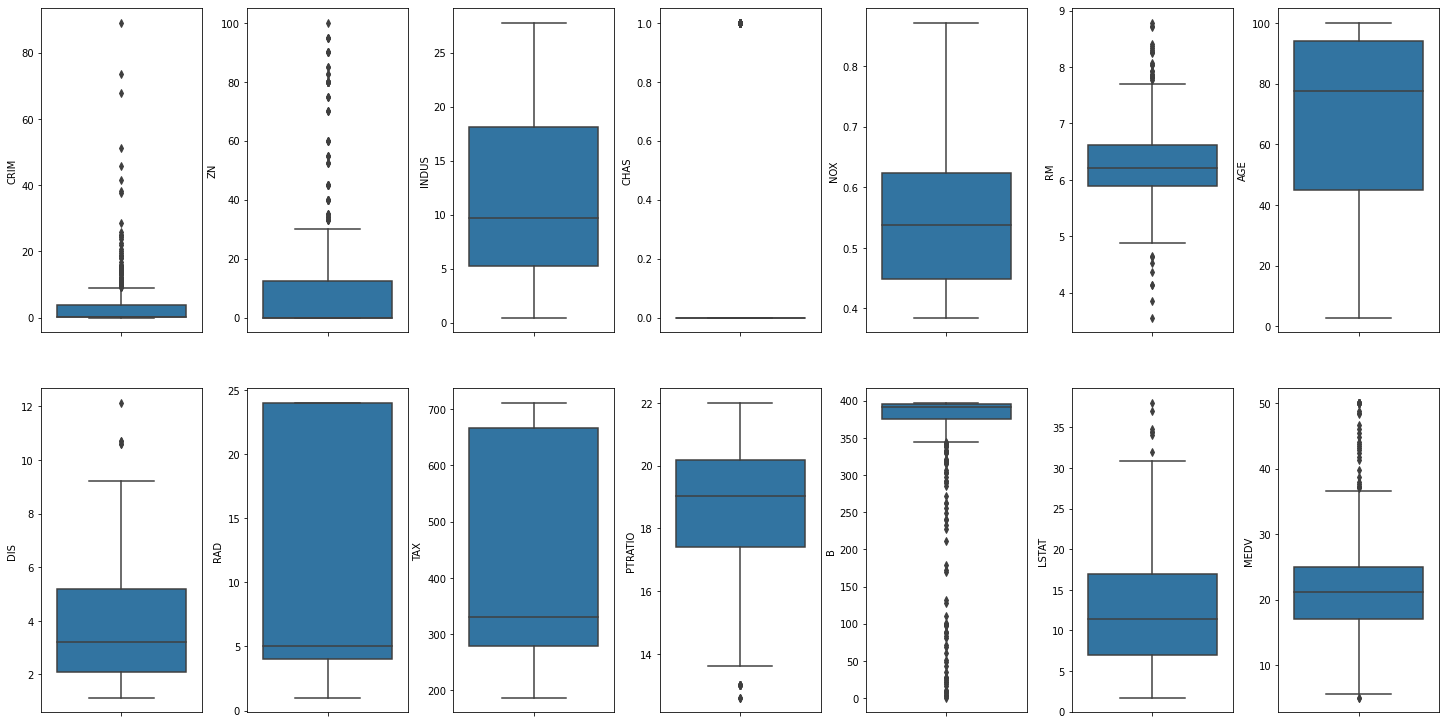

In [411]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_main.items():
    sns.boxplot(y=k, data=df_main, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


**Data description:**

1. CRIM  per capita crime rate by town
2. ZNproportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS proportion of non-retail business acres per town
4. CHAS  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX   nitric oxides concentration (parts per 10 million)
6. RMaverage number of rooms per dwelling
7. AGE   proportion of owner-occupied units built prior to 1940
8. DIS   weighted distances to five Boston employment centres
9. RAD   index of accessibility to radial highways
10. TAX  full-value property-tax rate per 10,000
11. PTRATIO  pupil-teacher ratio by town
12. B1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT% lower status of the population
14. MEDV Median value of owner-occupied homes in 1000s

In [412]:
# count the total number of null values in the DataFrame
total_nulls = df_main.isnull().sum().sum()

# calculate the percentage of null values in the DataFrame
null_percent = (total_nulls / (df_main.shape[0] * df_main.shape[1])) * 100

# print the total number of null values and the percentage of null values
print("Total number of nulls: ", total_nulls)
print("Percentage of null values: ", null_percent, "%")

# get a summary of null values per column
null_summary = df_main.isnull().sum()
print("\nSummary of null values by column:\n", null_summary)

# get a summary of non-null values per column
not_null_summary = df_main.notnull().sum()
print("\nSummary of non-null values by column:\n", not_null_summary)

Total number of nulls:  0
Percentage of null values:  0.0 %

Summary of null values by column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Summary of non-null values by column:
 CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64


In [413]:
# get a summary of the unique values per column
unique_summary = df_main.nunique()
print("\nSummary of unique values per column:\n", unique_summary)


Summary of unique values per column:
 CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64


Clean duplicate values of the dataset, before split.

In [414]:
df_main.drop_duplicates(inplace = True)

In [415]:
df_main.dropna(inplace=True)

In [416]:
df_main.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We split the dataset, train and test

In [417]:
import numpy as np
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_main, test_size=0.33, random_state=42)

**Train Dataset**

In [418]:
print(train.describe().round(2))

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  339.00  339.00  339.00  339.00  339.00  339.00  339.00  339.00  339.00   
mean     3.35   11.72   11.26    0.08    0.56    6.33   68.94    3.76    9.48   
std      7.69   22.98    6.97    0.27    0.12    0.72   27.95    2.14    8.67   
min      0.01    0.00    1.21    0.00    0.38    3.86    2.90    1.13    1.00   
25%      0.08    0.00    5.13    0.00    0.45    5.89   45.65    2.06    4.00   
50%      0.26    0.00    9.90    0.00    0.54    6.23   78.10    3.10    5.00   
75%      3.40   20.00   18.10    0.00    0.63    6.71   93.90    5.40   24.00   
max     88.98   95.00   27.74    1.00    0.87    8.78  100.00   12.13   24.00   

          TAX  PTRATIO       B   LSTAT    MEDV  
count  339.00   339.00  339.00  339.00  339.00  
mean   409.13    18.26  358.43   12.50   22.97  
std    166.32     2.25   88.60    7.18    9.40  
min    187.00    12.60    0.32    1.73    5.60  
25%    280.50    16.60  3

**Test Dataset**

In [419]:
print(test.describe().round(2))

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  167.00  167.00  167.00  167.00  167.00  167.00  167.00  167.00  167.00   
mean     4.15   10.65   10.88    0.05    0.55    6.20   67.83    3.86    9.68   
std     10.21   24.05    6.65    0.23    0.11    0.66   28.62    2.03    8.81   
min      0.01    0.00    0.46    0.00    0.39    3.56    6.20    1.17    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.87   41.95    2.27    4.00   
50%      0.22    0.00    8.56    0.00    0.53    6.17   74.80    3.55    5.00   
75%      4.19    0.00   18.10    0.00    0.61    6.46   94.10    5.06   24.00   
max     73.53  100.00   27.74    1.00    0.87    8.72  100.00   10.71   24.00   

          TAX  PTRATIO       B   LSTAT    MEDV  
count  167.00   167.00  167.00  167.00  167.00  
mean   406.42    18.85  353.11   12.97   21.64  
std    173.45     1.94   96.71    7.07    8.73  
min    188.00    13.00    2.52    2.88    5.00  
25%    277.00    17.80  3

### - Exercise 2
Apply some transformation process (standardize numerical data, create dummy columns, polynomials...).

#### Preprosecing

**Outliers**

Normally the procces for drop ouliers is better realize before split the dataset. In this particulary case, we proccess the outliers with the dataset train and test.

In [420]:
for k, v in train.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(train)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.57%
Column ZN outliers = 8.85%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.72%
Column AGE outliers = 0.00%
Column DIS outliers = 0.88%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 0.00%
Column B outliers = 15.34%
Column LSTAT outliers = 2.06%
Column MEDV outliers = 6.78%


In [421]:
for k, v in test.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(test)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 11.38%
Column ZN outliers = 100.00%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 2.40%
Column RM outliers = 7.19%
Column AGE outliers = 0.00%
Column DIS outliers = 1.20%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 1.80%
Column B outliers = 14.97%
Column LSTAT outliers = 1.20%
Column MEDV outliers = 8.98%


We could see that the values are differents, we should have care with delete values, in this case we selected the variable B, with 14.97% outliers. 

In [422]:
train = train[~(train['B'] <300)]
print(np.shape(train))

(304, 14)


In [423]:
test = test[~(test['B'] <300)]
print(np.shape(test))

(148, 14)


##### Proccesing dummy columns

We used the column RAD because is the unique categorical value not normalized.

In [424]:
import pandas as pd

df_dummies_train = pd.get_dummies(train["RAD"], prefix="RAD")

train = pd.concat([train, df_dummies_train], axis=1)
train.drop("RAD", axis=1, inplace=True)

print(train.head())


         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS    TAX  PTRATIO  \
478  10.23300   0.0  18.10     0  0.614  6.185  96.7  2.1705  666.0     20.2   
26    0.67191   0.0   8.14     0  0.538  5.813  90.3  4.6820  307.0     21.0   
7     0.14455  12.5   7.87     0  0.524  6.172  96.1  5.9505  311.0     15.2   
492   0.11132   0.0  27.74     0  0.609  5.983  83.5  2.1099  711.0     20.1   
108   0.12802   0.0   8.56     0  0.520  6.474  97.1  2.4329  384.0     20.9   

     ...  MEDV  RAD_1  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  RAD_7  RAD_8  RAD_24  
478  ...  14.6      0      0      0      0      0      0      0      0       1  
26   ...  16.6      0      0      0      1      0      0      0      0       0  
7    ...  27.1      0      0      0      0      1      0      0      0       0  
492  ...  20.1      0      0      0      1      0      0      0      0       0  
108  ...  19.8      0      0      0      0      1      0      0      0       0  

[5 rows x 22 columns]


In [425]:
df_dummies_test = pd.get_dummies(test["RAD"], prefix="RAD")

test = pd.concat([test, df_dummies_test], axis=1)
test.drop("RAD", axis=1, inplace=True)

print(test.head())

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS    TAX  PTRATIO  \
173  0.09178   0.0   4.05     0  0.510  6.416  84.1  2.6463  296.0     16.6   
274  0.05644  40.0   6.41     1  0.447  6.758  32.9  4.0776  254.0     17.6   
491  0.10574   0.0  27.74     0  0.609  5.983  98.8  1.8681  711.0     20.1   
72   0.09164   0.0  10.81     0  0.413  6.065   7.8  5.2873  305.0     19.2   
452  5.09017   0.0  18.10     0  0.713  6.297  91.8  2.3682  666.0     20.2   

     ...  MEDV  RAD_1  RAD_2  RAD_3  RAD_4  RAD_5  RAD_6  RAD_7  RAD_8  RAD_24  
173  ...  23.6      0      0      0      0      1      0      0      0       0  
274  ...  32.4      0      0      0      1      0      0      0      0       0  
491  ...  13.6      0      0      0      1      0      0      0      0       0  
72   ...  22.8      0      0      0      1      0      0      0      0       0  
452  ...  16.1      0      0      0      0      0      0      0      0       1  

[5 rows x 22 columns]


##### Standardization, train dataset

In [426]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
categorical_cols = ['CHAS', 'RAD']
num_df = train[numerical_cols]

# Standardize the numerical data
scaler = StandardScaler()
df_standardized_train = scaler.fit_transform(num_df)

# Convert back to a DataFrame
df_standardized_train = pd.DataFrame(df_standardized_train, columns=numerical_cols)

# Merge the scaled numerical columns with the original dataframe
train[numerical_cols] = df_standardized_train

Test

In [427]:
train_stats = train.describe().loc[['mean', 'std']].T
print(train_stats)

             mean       std
CRIM     0.007634  1.146596
ZN       0.014046  1.014436
INDUS   -0.036052  0.986755
CHAS     0.085526  0.280124
NOX     -0.064813  0.953177
RM       0.018050  1.027587
AGE     -0.064874  1.010667
DIS      0.027047  0.957974
TAX     -0.060263  0.966764
PTRATIO -0.041463  0.994589
B        0.035638  0.893391
LSTAT   -0.040099  0.996422
MEDV     0.019188  0.985914
RAD_1    0.049342  0.216938
RAD_2    0.062500  0.242461
RAD_3    0.078947  0.270101
RAD_4    0.207237  0.405995
RAD_5    0.233553  0.423788
RAD_6    0.059211  0.236407
RAD_7    0.042763  0.202656
RAD_8    0.059211  0.236407
RAD_24   0.207237  0.405995


We could see, after the transformation of the dataset, that the standard deviation was approximately 1 and the mean was approximately 0.

#####  Standardization, test dataset

In [428]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns for standardization
num_df = test[numerical_cols]

# Standardize the numerical data
scaler = StandardScaler()
df_standardized_test = scaler.fit_transform(num_df)

# Convert back to a DataFrame
df_standardized_test = pd.DataFrame(df_standardized_test, columns=numerical_cols)

# Merge the scaled numerical columns with the original dataframe
test[numerical_cols] = df_standardized_test

Test

In [429]:
test_stats = test.describe().loc[['mean', 'std']].T
print(test_stats)

             mean       std
CRIM     0.320293  1.530546
ZN      -0.003732  1.014844
INDUS    0.373722  1.138340
CHAS     0.054054  0.226892
NOX      0.204828  1.127319
RM      -0.075262  1.230388
AGE      0.205801  0.991619
DIS     -0.195721  1.108838
TAX      0.363291  1.115579
PTRATIO  0.044332  0.927780
B       -0.148474  1.128579
LSTAT    0.227886  1.156977
MEDV    -0.194213  1.094254
RAD_1    0.033784  0.181286
RAD_2    0.033784  0.181286
RAD_3    0.094595  0.293648
RAD_4    0.290541  0.455553
RAD_5    0.229730  0.422087
RAD_6    0.054054  0.226892
RAD_7    0.027027  0.162713
RAD_8    0.040541  0.197893
RAD_24   0.195946  0.398275


### - Exercise 3
It summarizes the newly generated columns statistically and graphically 

In [430]:
train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,197.000000,197.000000,197.000000,304.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,0.007634,0.014046,-0.036052,0.085526,-0.064813,0.018050,-0.064874,0.027047,-0.060263,-0.041463,...,0.019188,0.049342,0.062500,0.078947,0.207237,0.233553,0.059211,0.042763,0.059211,0.207237
std,1.146596,1.014436,0.986755,0.280124,0.953177,1.027587,1.010667,0.957974,0.966764,0.994589,...,0.985914,0.216938,0.242461,0.270101,0.405995,0.423788,0.236407,0.202656,0.236407,0.405995
min,-0.371393,-0.547473,-1.342935,0.000000,-1.402083,-3.090181,-2.244851,-1.294923,-1.273028,-2.507572,...,-1.809043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.362230,-0.547473,-0.810101,0.000000,-0.877001,-0.660576,-0.863047,-0.820700,-0.711188,-0.701704,...,-0.514817,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.342348,-0.547473,-0.384413,0.000000,-0.264406,-0.069478,0.056980,-0.208307,-0.521803,0.110936,...,-0.191260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.193592,0.290552,1.096808,0.000000,0.523216,0.502194,0.910032,0.814047,0.254672,0.923577,...,0.477423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.653082,3.433148,2.492602,1.000000,2.851078,3.350840,1.177933,2.422657,2.028571,1.375044,...,2.807030,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [431]:
test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,56.000000,56.000000,56.000000,148.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.320293,-0.003732,0.373722,0.054054,0.204828,-0.075262,0.205801,-0.195721,0.363291,0.044332,...,-0.194213,0.033784,0.033784,0.094595,0.290541,0.229730,0.054054,0.027027,0.040541,0.195946
std,1.530546,1.014844,1.138340,0.226892,1.127319,1.230388,0.991619,1.108838,1.115579,0.927780,...,1.094254,0.181286,0.181286,0.293648,0.455553,0.422087,0.226892,0.162713,0.197893,0.398275
min,-0.343018,-0.477650,-1.470622,0.000000,-1.368618,-4.067527,-1.996565,-1.369650,-1.193206,-2.245795,...,-2.034019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.333172,-0.477650,-0.615398,0.000000,-0.918695,-0.761388,-0.676642,-1.095050,-0.500042,-0.488277,...,-0.700599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.319927,-0.477650,0.366182,0.000000,0.069559,-0.161314,0.634551,-0.606094,0.096329,0.209561,...,-0.327472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.274016,-0.353402,1.247601,0.000000,0.916705,0.410093,1.079763,0.361792,1.791770,0.752324,...,0.132427,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.319393,3.299492,2.733070,1.000000,3.349787,3.827456,1.222929,3.264267,2.072783,1.269241,...,3.172394,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


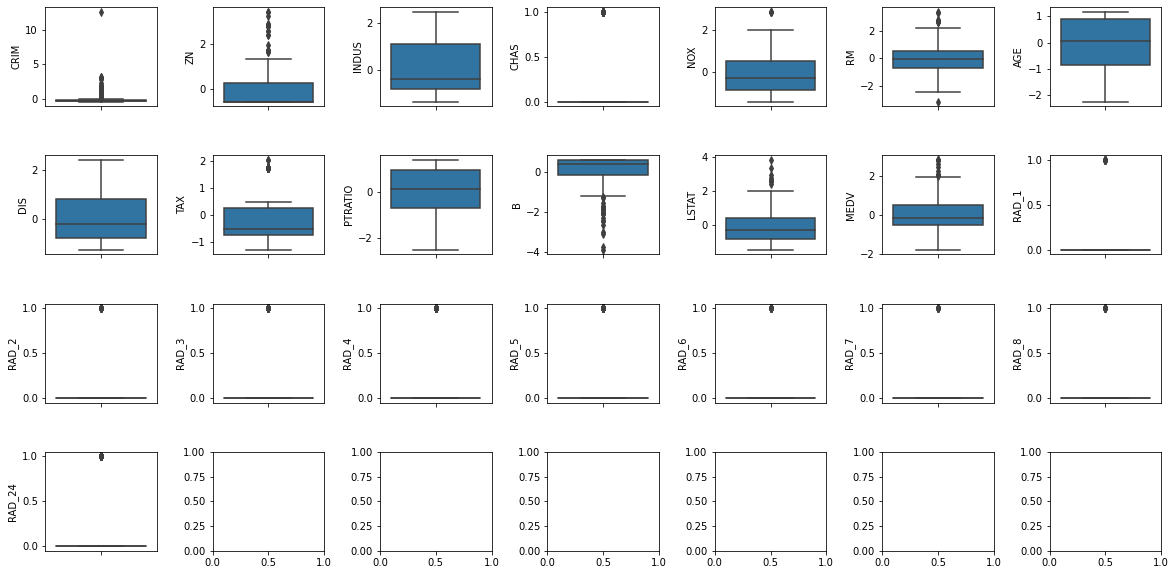

In [432]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in train.items():
    sns.boxplot(y=k, data=train, ax=axs[index])
    index += 1

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [433]:
column_names = df_main.columns.tolist()
column_names_str = ', '.join(column_names)
print(column_names_str)


CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV


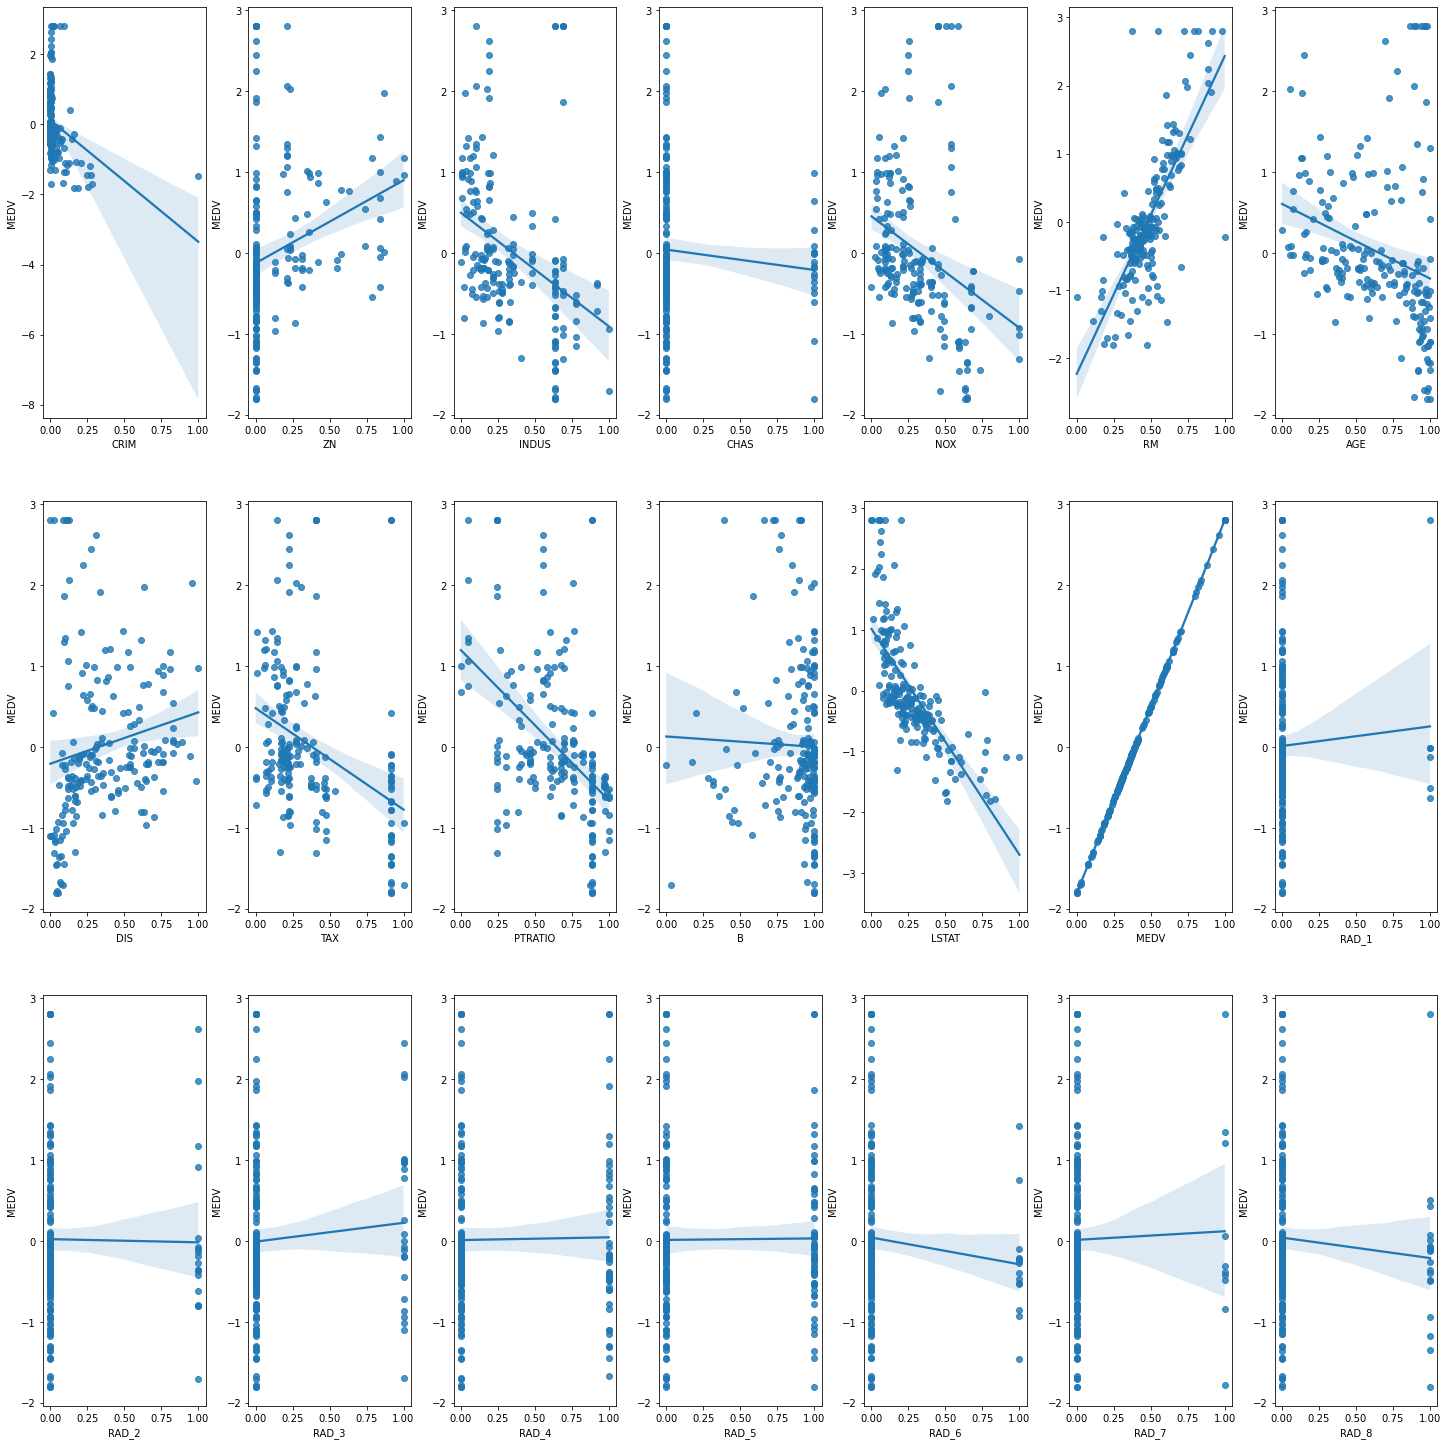

In [434]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

min_max_scaler = preprocessing.MinMaxScaler()

column_sels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
 'LSTAT', 'MEDV', 'RAD_1', 'RAD_2', 'RAD_3', 'RAD_4', 'RAD_5', 'RAD_6', 'RAD_7', 'RAD_8']
x = train.loc[:,column_sels]
y = train['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=7, nrows=3, figsize=(20, 20))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


<AxesSubplot:>

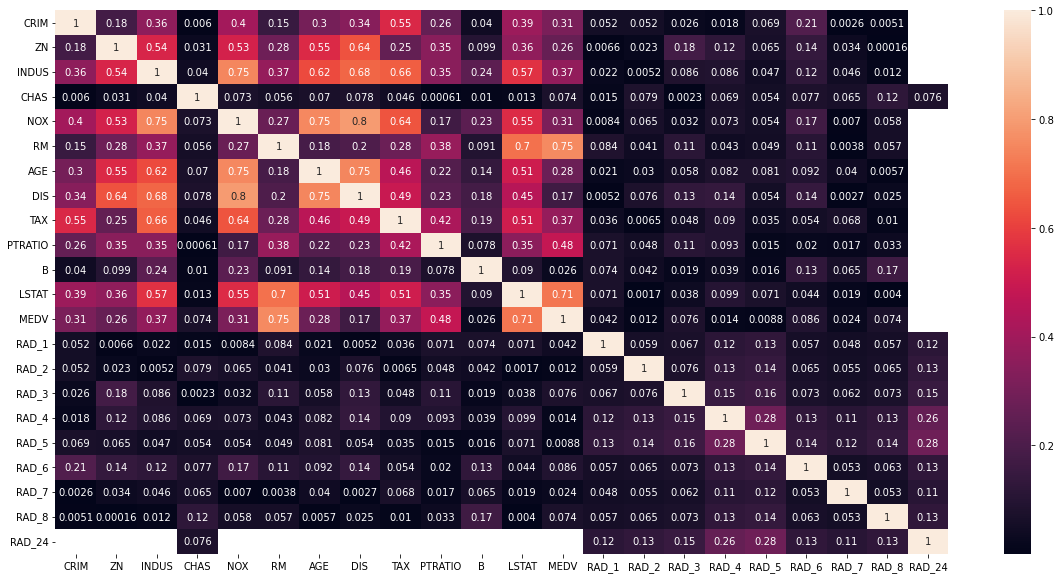

In [435]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr().abs(),  annot=True)